Name: Bhavesh Waghela

Student Number: N01639685

In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

In [2]:
dataset = pd.read_csv('WEC_Sydney_100.csv')
dataset

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,52910.73,58836.45,66358.12,70612.76,56787.64,64467.41,70684.50,65052.85,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,61488.75,61218.11,60007.02,59046.63,63865.77,67528.12,73769.96,66491.47,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,52752.08,54870.32,59601.57,57798.28,66660.45,69518.08,74935.21,68514.79,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,58755.78,64815.63,62083.71,58053.22,80885.70,82062.11,80004.48,69454.11,0.67,7084526.52


In [3]:
dataset.tail()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,52910.73,58836.45,66358.12,70612.76,56787.64,64467.41,70684.50,65052.85,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,61488.75,61218.11,60007.02,59046.63,63865.77,67528.12,73769.96,66491.47,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,52752.08,54870.32,59601.57,57798.28,66660.45,69518.08,74935.21,68514.79,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,58755.78,64815.63,62083.71,58053.22,80885.70,82062.11,80004.48,69454.11,0.67,7084526.52
2317,48.0,1.0,98.00,50.00,148.00,100.00,198.00,150.0,398.0,0.0,...,68332.23,64935.74,62081.08,60460.67,71311.28,74876.47,78594.64,71913.86,0.68,7164915.15


In [4]:
dataset.isna().sum().sum()

0

In [5]:
num_wecs = 100 

# Generate column names dynamically for X and Y coordinates
column_names_x = [f'X{i}' for i in range(1, num_wecs + 1)]
column_names_y = [f'Y{i}' for i in range(1, num_wecs + 1)]


# Combine X and Y columns
column_names = column_names_x + column_names_y + ['Total_Power']

# Extract features (X) and target variable (y)
dataset = dataset[column_names]

dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y92,Y93,Y94,Y95,Y96,Y97,Y98,Y99,Y100,Total_Power
0,1.0,1.00,1.00,1.00,398.0,397.46,397.18,349.00,598.0,597.46,...,1398.0,1200.0,1275.07,1349.14,1398.0,1200.0,1275.07,1349.14,1398.0,7247491.41
1,198.0,197.18,193.59,77.58,598.0,597.18,593.59,477.58,798.0,797.18,...,1398.0,1200.0,1280.53,1350.00,1398.0,1200.0,1280.53,1350.00,1398.0,7119352.90
2,198.0,197.07,192.74,84.67,798.0,797.07,792.74,684.67,998.0,997.07,...,1398.0,1200.0,1276.64,1355.74,1398.0,1200.0,1276.64,1355.74,1398.0,7148342.69
3,1.0,1.00,1.00,1.00,398.0,397.07,392.74,349.00,798.0,797.07,...,1398.0,1200.0,1276.56,1354.90,1398.0,1200.0,1276.56,1354.90,1398.0,7317998.83
4,198.0,197.46,197.18,149.00,598.0,597.46,597.18,549.00,998.0,997.46,...,1198.0,1200.0,1275.07,1349.14,1398.0,1200.0,1275.07,1349.14,1398.0,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,197.60,193.04,84.79,398.0,397.60,393.04,284.79,598.0,597.60,...,1198.0,1200.0,1272.52,1350.00,1398.0,1200.0,1272.52,1350.00,1398.0,6931277.32
2314,198.0,96.79,192.57,86.00,398.0,346.79,392.57,255.00,618.0,596.79,...,1398.0,1200.0,1274.77,1350.00,1408.0,1195.0,1274.77,1400.00,1403.0,7192144.17
2315,598.0,597.72,593.10,549.00,198.0,197.72,193.10,149.00,398.0,397.72,...,1398.0,1200.0,1267.53,1346.65,1398.0,1200.0,1267.53,1346.65,1398.0,6799187.00
2316,398.0,397.18,393.59,277.58,1398.0,1397.18,1393.59,1277.58,398.0,397.18,...,1398.0,1200.0,1280.53,1350.00,1398.0,1200.0,1280.53,1350.00,1398.0,7084526.52


In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,1854.0,1.750434e+02,172.849509,0.00,48.00,198.000,198.000,1398.00
X2,1854.0,2.039537e+02,172.815809,0.00,100.00,197.070,201.000,1414.00
X3,1854.0,2.251456e+02,182.153753,0.00,192.57,193.700,250.000,1400.00
X4,1854.0,2.133537e+02,226.177273,0.00,78.60,95.560,279.655,1413.22
X5,1854.0,5.465644e+02,204.426957,0.00,398.00,401.000,636.285,1412.46
...,...,...,...,...,...,...,...,...
Y97,1854.0,1.230488e+03,98.620077,76.79,1200.00,1200.000,1200.000,1450.00
Y98,1854.0,1.290511e+03,78.889248,125.54,1274.75,1277.610,1278.770,1450.00
Y99,1854.0,1.355698e+03,72.891211,167.60,1350.00,1350.000,1354.530,1450.00
Y100,1854.0,1.397207e+03,73.578608,132.73,1398.00,1398.000,1398.000,1450.00


In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Total_Power')
test_labels = test_features.pop('Total_Power')

In [9]:
# Normalize the target variable (Total_Power)
y_mean = train_labels.mean()
y_std = train_labels.std()
y_normalized = (train_labels - y_mean) / y_std

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
X1,1.750434e+02,172.849509
X2,2.039537e+02,172.815809
X3,2.251456e+02,182.153753
X4,2.133537e+02,226.177273
X5,5.465644e+02,204.426957
...,...,...
Y97,1.230488e+03,98.620077
Y98,1.290511e+03,78.889248
Y99,1.355698e+03,72.891211
Y100,1.397207e+03,73.578608


In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[ 175.04344   203.9537    225.14561   213.35367   546.56445   561.9887
   581.1926    553.16113   897.1456    922.8767    701.11926   659.61597
   967.60675   994.49365  1016.9813    961.2696    911.49506   938.77264
   960.73376   921.7028    599.69684   632.1351    647.31824   611.62897
   730.62476   753.0667    775.7173    734.52435   967.73267   988.5247
   767.6233    717.3717    647.7961    673.37006   698.508     657.12036
   881.70355   897.23676   919.811     868.45447   737.5966    763.18115
   781.93744   744.1683    636.8003    658.0222    689.8543    647.0149
   870.89667   896.3337    686.3995    651.9861    675.8017    706.81464
   731.26166   682.41956   731.9375    752.5213    768.9279    731.369
   693.88666   719.0513    737.12854   703.5057    752.60693   784.20123
   812.9041    765.94714   848.8072    862.7247    654.3628    612.0771
   737.8328    763.97076   790.03827   751.8416    868.13776   895.0089
   915.2414    884.2763    431.25665   444.3438    479.349

In [13]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 198.    197.07  193.7    84.98  398.    397.07  393.7   284.98  848.
   898.    948.    998.   1198.   1197.07 1193.7  1084.98 1398.   1397.07
  1393.7  1284.98  798.    797.07  793.7   684.98 1198.   1197.07 1193.7
  1084.98 1398.   1397.07 1393.7  1284.98  398.    397.07  393.7   284.98
   998.    997.07  993.7   884.98   48.     98.    148.    198.    798.
   797.07  793.7   684.98 1198.   1197.07 1193.7  1084.98  398.    397.07
   393.7   284.98 1198.   1197.07 1193.7  1084.98  198.    197.07  193.7
    84.98  398.    397.07  393.7   284.98  598.    597.07  593.7   484.98
  1198.   1197.07 1193.7  1084.98 1398.   1397.07 1393.7  1284.98    1.
     1.      1.     50.    398.    397.07  393.7   284.98  798.    797.07
   793.7   684.98 1198.   1197.07 1193.7  1084.98 1398.   1397.07 1393.7
  1284.98    0.     77.44  150.    198.      0.     77.44  150.    198.
     1.     50.    100.    150.      0.     77.44  150.    198.      0.
    77.44  150.    198.    200.    2

In [14]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
    return model

In [15]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 200)               401       
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19538 (76.32 KB)
Trainable params: 19137 (74.75 KB)
Non-trainable params: 401 (1.57 KB)
____________________

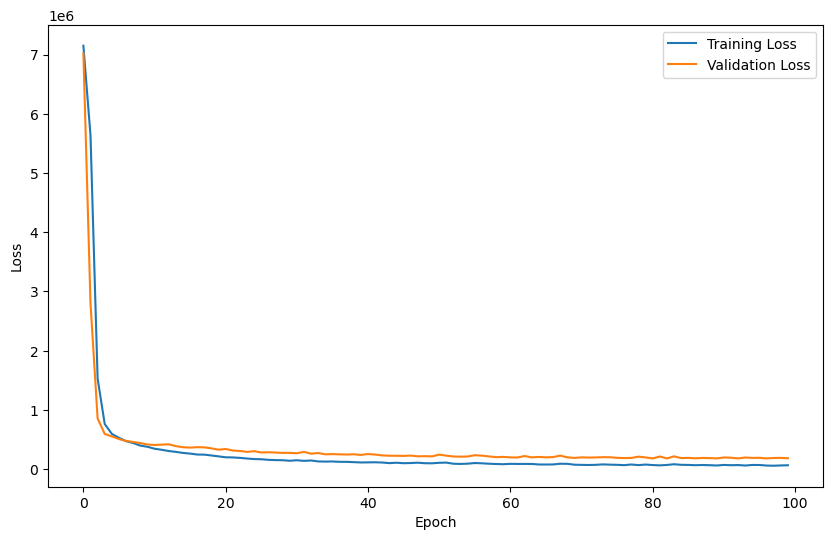

In [16]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epochs = []
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(self.epochs, self.losses, label='Training Loss')
        plt.plot(self.epochs, self.val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
live_plot = LivePlotCallback()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100,
    callbacks=[live_plot])

In [17]:
loss = dnn_model.evaluate(train_features, y_n, verbose=0)
print(f"Mean Absolute Error on Training Set: {loss}")

Mean Absolute Error on Training Set: 84396.265625


In [18]:
predictions_normalized = dnn_model.predict(test_features)

15/15 [==============================] - 0s 2ms/step


In [34]:
predictions = predictions_normalized * y_std + y_mean

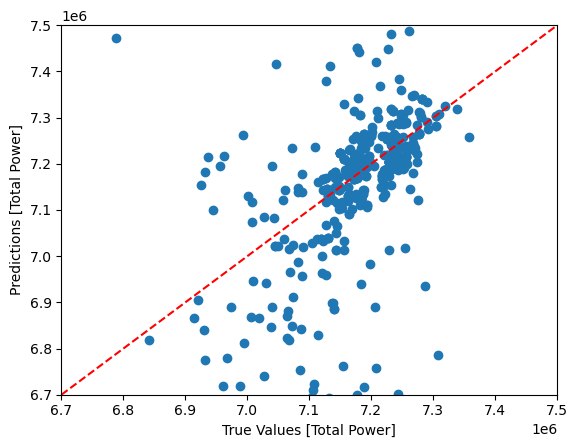

In [19]:
# Plot the scatter plot
plt.scatter(test_labels, predictions_normalized)
plt.xlabel('True Values [Total Power]')
plt.ylabel('Predictions [Total Power]')

# Set the limits for better visualization
lims = [6700000, 7500000]
plt.xlim(lims)
plt.ylim(lims)

# Plot a diagonal line for reference
_ = plt.plot(lims, lims, color='red', linestyle='--')

plt.show()

In [37]:
def build_and_compile_model_2(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
         layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(0.001))
    return model

In [38]:
dnn_model_sgd = build_and_compile_model(normalizer)
dnn_model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 200)               401       
 on)                                                             
                                                                 
 dense_10 (Dense)            (None, 64)                12864     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19538 (76.32 KB)
Trainable params: 19137 (74.75 KB)
Non-trainable params: 401 (1.57 KB)
__________________

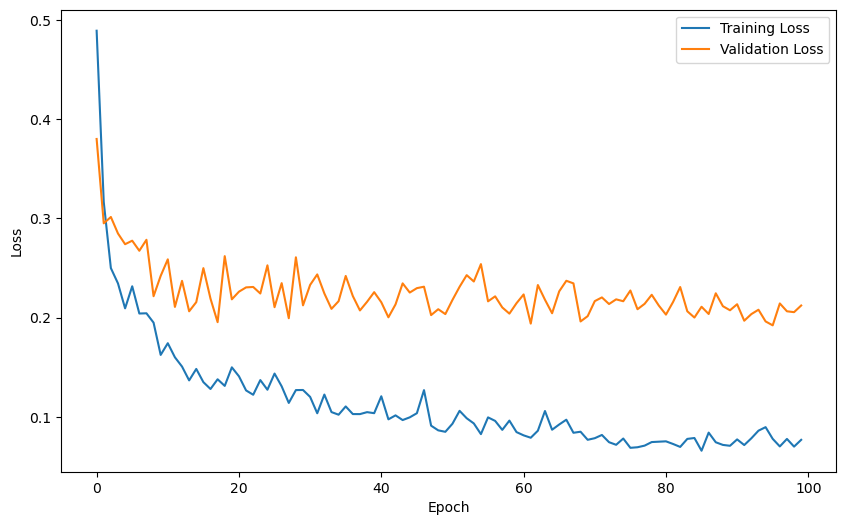

In [39]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epochs = []
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(self.epochs, self.losses, label='Training Loss')
        plt.plot(self.epochs, self.val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
live_plot = LivePlotCallback()

history = dnn_model_sgd.fit(
    train_features,
    y_normalized,
    validation_split=0.2,
    verbose=0,
    epochs=100,
    callbacks=[live_plot])

In [40]:
loss = dnn_model_sgd.evaluate(train_features, y_normalized, verbose=0)
print(f"Mean Absolute Error on Training Set: {loss}")

Mean Absolute Error on Training Set: 0.10546934604644775


In [41]:
predictions_normalized = dnn_model_sgd.predict(test_features)

predictions = predictions_normalized * y_std + y_mean

15/15 [==============================] - 0s 2ms/step


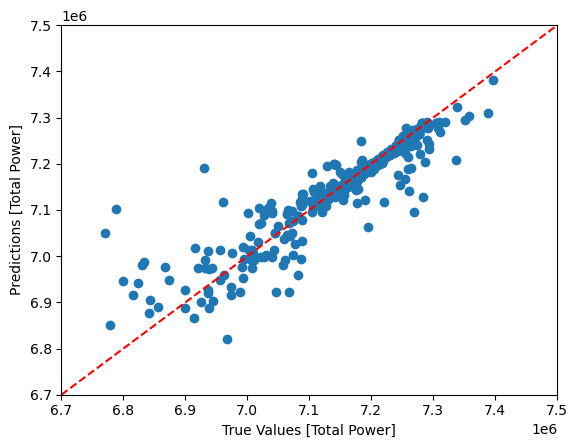

In [42]:
# Plot the scatter plot
plt.scatter(test_labels, predictions)
plt.xlabel('True Values [Total Power]')
plt.ylabel('Predictions [Total Power]')

# Set the limits for better visualization
lims = [6700000, 7500000]
plt.xlim(lims)
plt.ylim(lims)

# Plot a diagonal line for reference
_ = plt.plot(lims, lims, color='red', linestyle='--')

plt.show()

Observation:

Model 1:
Optimizer = Adam
Learning Rate = 0.01
Mean Absolute Error = 0.095

Model 2:
Optimizer = SGD
Learning Rate = 0.001
Mean Absolute Error = 0.105

Model 1 performed better with the following hyperparameters and model 2 was also good in predecting the Total Power attribute.